In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
import folium
from folium import plugins

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('Toronto_prices.csv')

In [3]:
df = data[['Address','AreaName','Price ($)','lat', 'lng']].reset_index(drop=True)
df.columns = ['Address','Area','Price','lat', 'lng']
df.head()

,Address,Area,Price,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Price,lat,lng
count,25351,25351,25351
mean,564544,37.3678,-85.1821
std,847596,82.6023,72.8679
min,0,-999,-999
25%,219900,43.4012,-80.3081
50%,371900,43.7161,-79.5033
75%,619900,44.4667,-79.107
max,3.25e+07,53.851,1.07452


In [5]:
#Summary of N/A Values
df.isnull().sum()

Address      0
Area       483
Price        0
lat          0
lng          0
dtype: int64

In [6]:
#Null Values
dfnull = df[df.isna().any(axis=1)]
print (dfnull)

                                           Address Area   Price         lat  \
209              7393 Wellington Rd 51 . Ariss, ON  NaN  699000   43.596718   
1022               120 WOODBURN Road Glanbrook, ON  NaN  329900 -999.000000   
1132       457289 CONCESSION 8  S Sydenham Twp, ON  NaN  729900 -999.000000   
1186                      152 MARR Drive Elora, ON  NaN  399900   43.693314   
1192   3058 Bruce Road 20 Other Bruce Township, ON  NaN  189900 -999.000000   
...                                            ...  ...     ...         ...   
24558    823 English Settlement Rd Murray Ward, ON  NaN  699000 -999.000000   
24586           3606 CEDAR GROVE ROAD Prescott, ON  NaN  399999   44.743317   
25095     7256 Wellington Road 124 Road Guelph, ON  NaN  499900   43.494778   
25099   7985 Tait`s Beach Rd Hamilton Township, ON  NaN  599000   44.109016   
25233    0 Cornish Hollow Rd Hamilton Township, ON  NaN  399500   44.028290   

              lng  
209    -80.340660  
1022  -999.

In [7]:
d = {'mean':'AveragePrice','min':'LowestPrice','max':'HighestPrice', 'count':'#Houses'}
dfArea = df.pivot_table(index=['Area'],values='Price', aggfunc=('min','mean','max','count')).rename(columns=d).reset_index()
dfArea.head()

,Area,#Houses,HighestPrice,AveragePrice,LowestPrice
0,Aberfoyle,1.0,68000.0,6.800000e+04,68000.0
1,Acton,3.0,529000.0,3.793000e+05,259000.0
2,Agassiz,1.0,74000.0,7.400000e+04,74000.0
3,Agincourt,106.0,1658000.0,4.252873e+05,49.0
4,Agincourt North,2.0,2200000.0,2.200000e+06,2200000.0


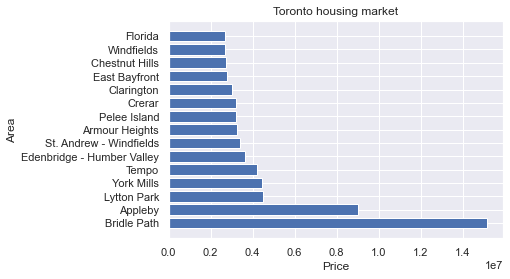

In [8]:
dfArea2=dfArea.sort_values(by="AveragePrice", ascending=False)
dfArea_final=dfArea2.iloc[:15, :].round(5)

plt.barh(dfArea_final.Area, width= dfArea_final.AveragePrice)
plt.title ("Toronto housing market")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

In [9]:
# Plot heatmap
m = folium.Map([43.6532, -79.3832], zoom_start=11)

stationArr = df[['lat', 'lng']].to_numpy()


m.add_child(plugins.HeatMap(stationArr, radius = 15))
m

In [10]:
areas = gpd.read_file('Neighbourhoods.shp')
areas.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,FIELD_17,FIELD_18,geometry
0,11201,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,None,None,None,17545105,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,11202,2480140,26005520,None,95,95,Annex (95),Annex (95),None,None,None,None,17545121,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,11203,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,None,None,None,17545137,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."
3,11204,2480064,26005444,None,64,64,Woodbine Corridor (64),Woodbine Corridor (64),None,None,None,None,17545153,3.052518e+06,7512.966773,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666..."
4,11205,2480063,26005443,None,103,103,Lawrence Park South (103),Lawrence Park South (103),None,None,None,None,17545169,6.211341e+06,13530.370002,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703..."


In [11]:
areas['neighbourhood'] = areas['FIELD_7'].str.replace(' \(.+\)', '').str.lower()
areas.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,FIELD_17,FIELD_18,geometry,neighbourhood
0,11201,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,None,None,None,17545105,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",casa loma
1,11202,2480140,26005520,None,95,95,Annex (95),Annex (95),None,None,None,None,17545121,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",annex
2,11203,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,None,None,None,17545137,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",caledonia-fairbank
3,11204,2480064,26005444,None,64,64,Woodbine Corridor (64),Woodbine Corridor (64),None,None,None,None,17545153,3.052518e+06,7512.966773,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",woodbine corridor
4,11205,2480063,26005443,None,103,103,Lawrence Park South (103),Lawrence Park South (103),None,None,None,None,17545169,6.211341e+06,13530.370002,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",lawrence park south


In [12]:
areas.isnull().sum()

FIELD_1            0
FIELD_2            0
FIELD_3            0
FIELD_4          140
FIELD_5            0
FIELD_6            0
FIELD_7            0
FIELD_8            0
FIELD_9          140
FIELD_10         140
FIELD_11         140
FIELD_12         140
FIELD_13           0
FIELD_14           0
FIELD_15           0
FIELD_17         101
FIELD_18         101
geometry           0
neighbourhood      0
dtype: int64

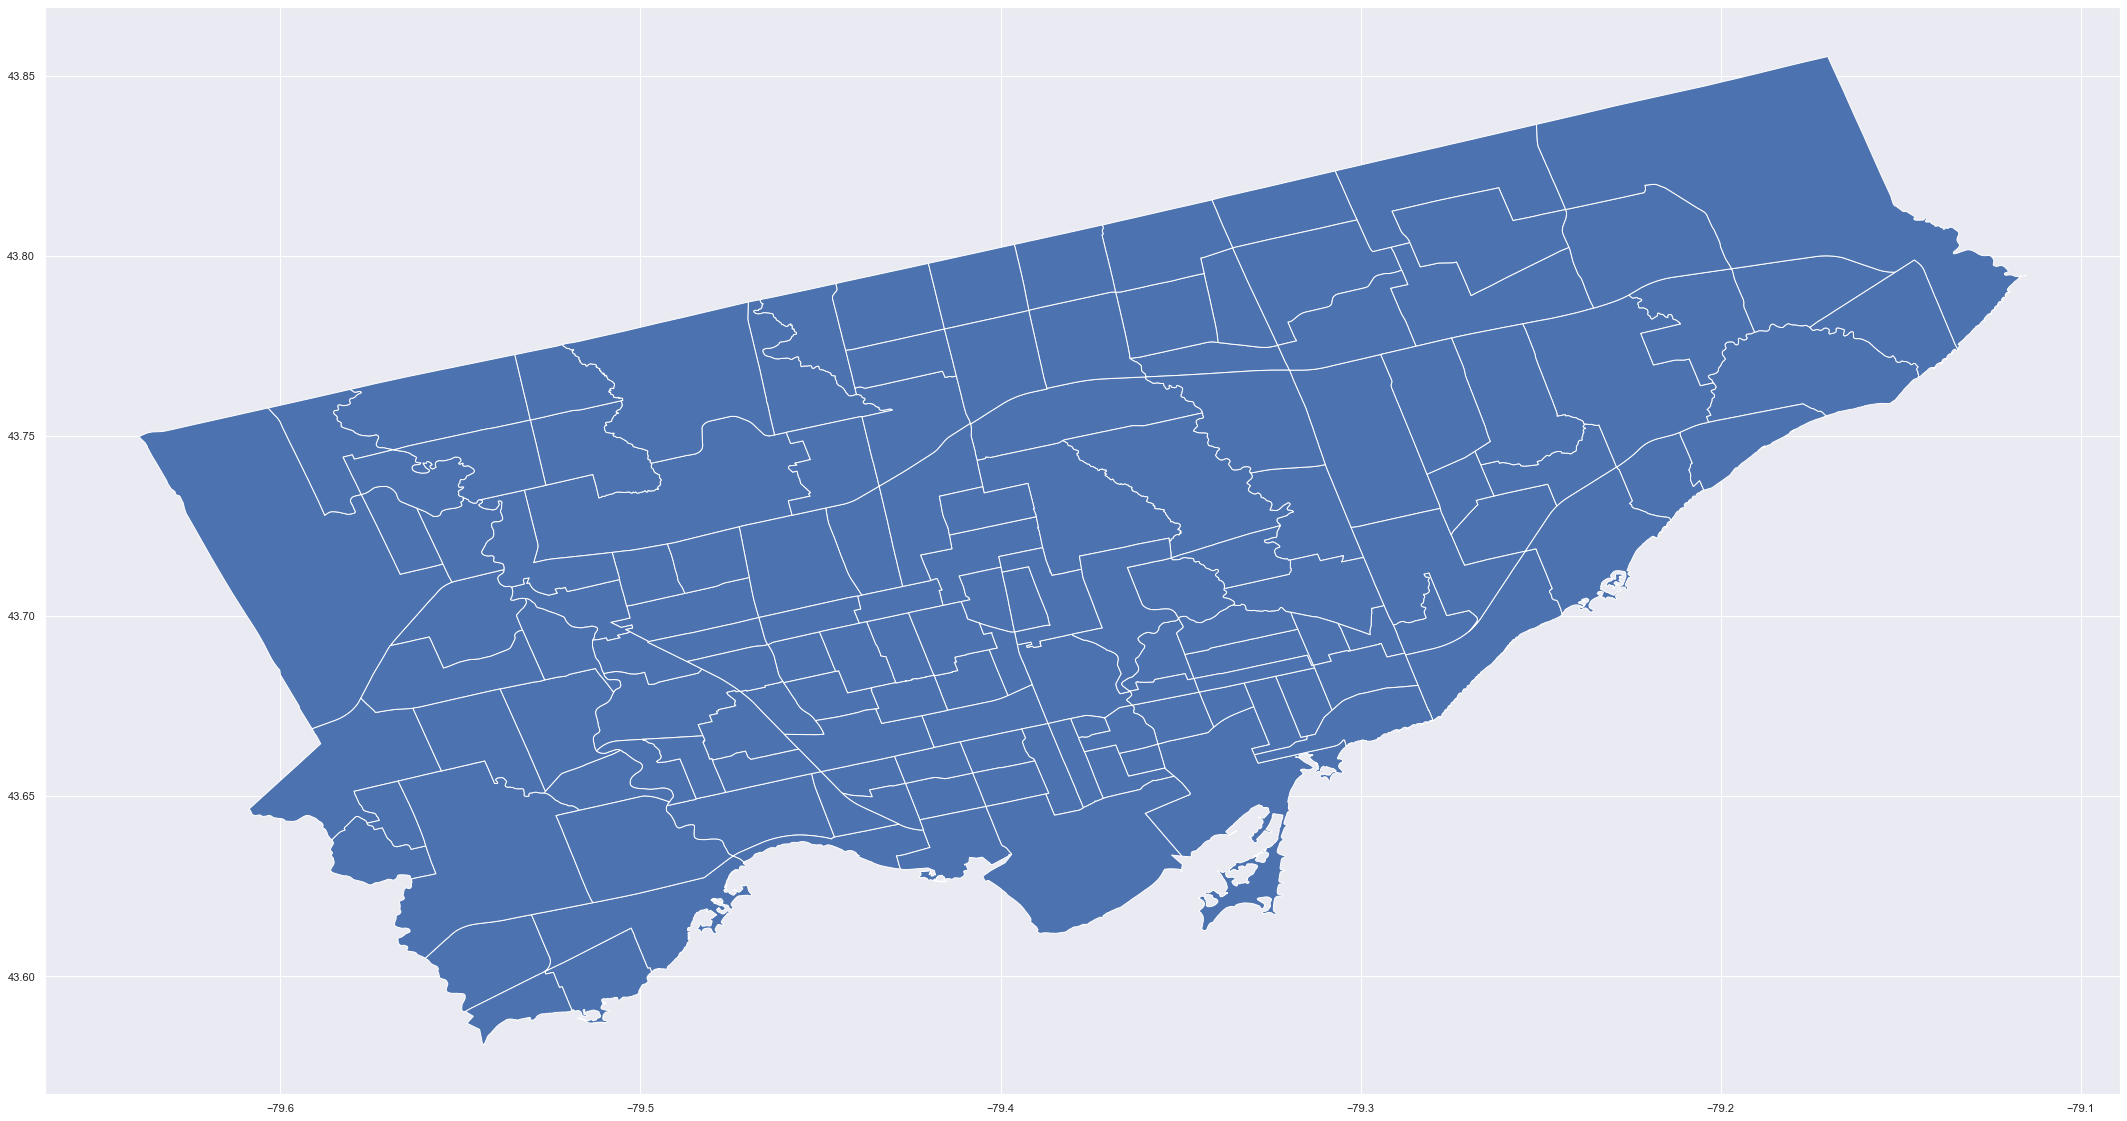

In [13]:
areas.plot(figsize=(40,20))
plt.show()

In [14]:
#Change data
dfArea['Area'] = dfArea['Area'].str.lower()
dfArea.sort_values('AveragePrice', ascending=False).head(10)

,Area,#Houses,HighestPrice,AveragePrice,LowestPrice
120,bridle path,7.0,26800000.0,1.518329e+07,9688000.0
30,appleby,1.0,9000000.0,9.000000e+06,9000000.0
618,lytton park,1.0,4499900.0,4.499900e+06,4499900.0
1114,york mills,24.0,14800000.0,4.436242e+06,145.0
967,tempo,3.0,9895000.0,4.198333e+06,1350000.0
336,edenbridge - humber valley,18.0,7398000.0,3.627822e+06,399900.0
920,st. andrew - windfields,23.0,7395000.0,3.393979e+06,113.0
33,armour heights,2.0,4950000.0,3.270000e+06,1590000.0
770,pelee island,1.0,3200000.0,3.200000e+06,3200000.0
270,crerar,1.0,3199818.0,3.199818e+06,3199818.0


In [15]:
#Merge datasets
merged = areas.set_index('neighbourhood').join(dfArea.set_index('Area'))
merged = merged.reset_index()
merged['AveragePrice'] = merged['AveragePrice'].fillna(0)

In [16]:
merged.head()

,neighbourhood,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,...,FIELD_13,FIELD_14,FIELD_15,FIELD_17,FIELD_18,geometry,#Houses,HighestPrice,AveragePrice,LowestPrice
0,casa loma,11201,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,...,17545105,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",1.0,35000.0,35000.0,35000.0
1,annex,11202,2480140,26005520,None,95,95,Annex (95),Annex (95),None,...,17545121,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",NaN,NaN,0.0,NaN
2,caledonia-fairbank,11203,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,...,17545137,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",NaN,NaN,0.0,NaN
3,woodbine corridor,11204,2480064,26005444,None,64,64,Woodbine Corridor (64),Woodbine Corridor (64),None,...,17545153,3.052518e+06,7512.966773,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",NaN,NaN,0.0,NaN
4,lawrence park south,11205,2480063,26005443,None,103,103,Lawrence Park South (103),Lawrence Park South (103),None,...,17545169,6.211341e+06,13530.370002,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",1.0,539900.0,539900.0,539900.0


In [17]:
merged.dtypes

neighbourhood      object
FIELD_1             int64
FIELD_2             int64
FIELD_3             int64
FIELD_4            object
FIELD_5             int64
FIELD_6             int64
FIELD_7            object
FIELD_8            object
FIELD_9            object
FIELD_10           object
FIELD_11           object
FIELD_12           object
FIELD_13            int64
FIELD_14          float64
FIELD_15          float64
FIELD_17           object
FIELD_18           object
geometry         geometry
#Houses           float64
HighestPrice      float64
AveragePrice      float64
LowestPrice       float64
dtype: object

In [18]:
mergedsort= merged.sort_values(by="AveragePrice", ascending=False)
mergedsort.head(5)

,neighbourhood,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,...,FIELD_13,FIELD_14,FIELD_15,FIELD_17,FIELD_18,geometry,#Houses,HighestPrice,AveragePrice,LowestPrice
56,agincourt north,11257,2480178,26005558,None,129,129,Agincourt North (129),Agincourt North (129),None,...,17546001,1.395145e+07,17159.740667,None,None,"POLYGON ((-79.24213 43.80247, -79.24319 43.802...",2.0,2200000.0,2.200000e+06,2200000.0
121,mount pleasant east,11322,2480148,26005528,None,99,99,Mount Pleasant East (99),Mount Pleasant East (99),None,...,17547041,5.914750e+06,15568.659276,None,None,"POLYGON ((-79.37749 43.71309, -79.37739 43.712...",3.0,1599900.0,1.332933e+06,799000.0
32,guildwood,11233,2480123,26005503,None,140,140,Guildwood (140),Guildwood (140),None,...,17545617,7.294790e+06,13609.015920,None,None,"POLYGON ((-79.21128 43.75113, -79.21124 43.751...",4.0,2899000.0,1.257000e+06,699000.0
22,mount pleasant west,11223,2480051,26005431,None,104,104,Mount Pleasant West (104),Mount Pleasant West (104),None,...,17545457,2.572074e+06,7176.465265,None,None,"POLYGON ((-79.39611 43.69566, -79.39620 43.696...",3.0,1615000.0,1.145667e+06,467000.0
119,oakwood village,11320,2480150,26005530,None,107,107,Oakwood Village (107),Oakwood Village (107),None,...,17547009,4.247608e+06,8766.961761,None,None,"POLYGON ((-79.45028 43.69569, -79.44934 43.695...",4.0,1499000.0,1.104000e+06,659000.0


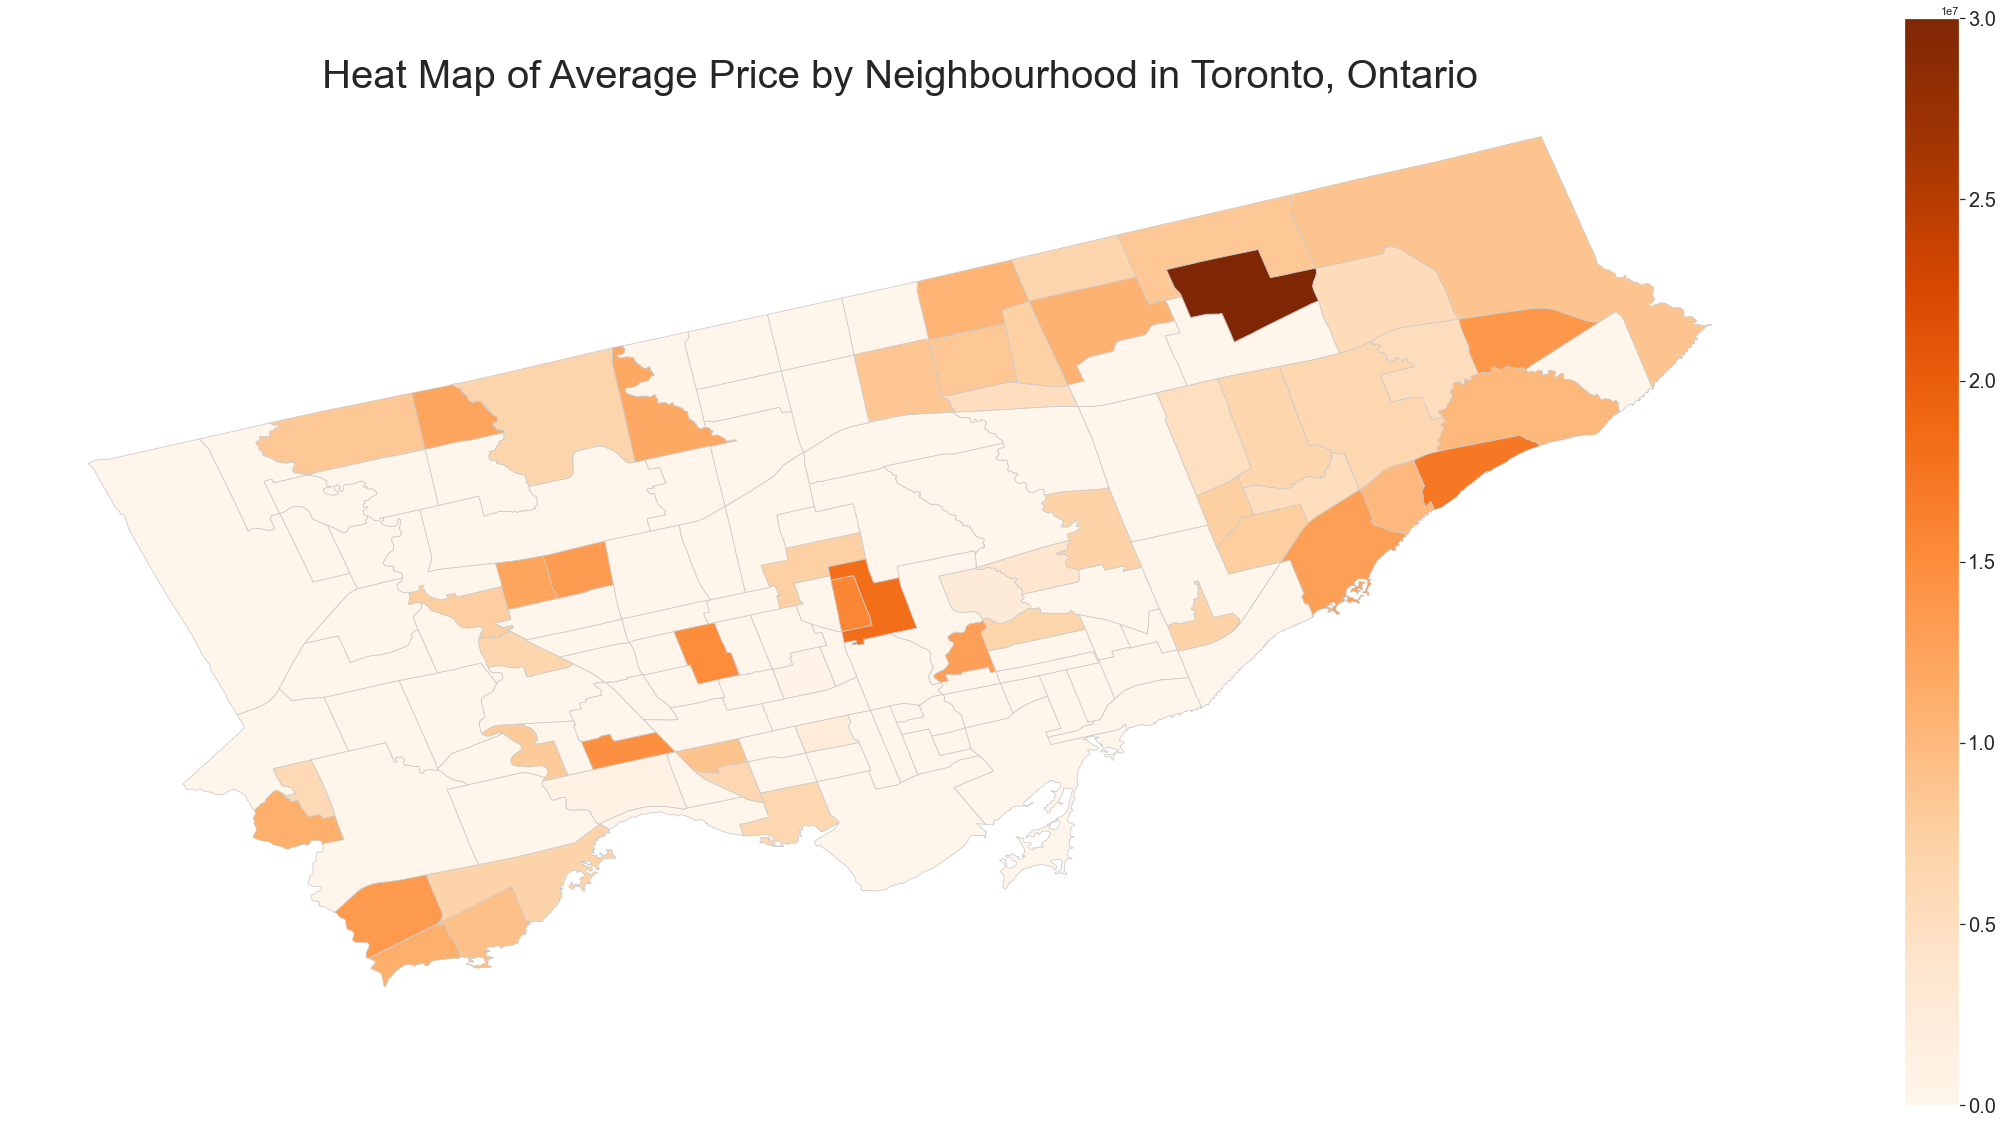

In [19]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Average Price by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, 30000000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('AveragePrice', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

plt.show()

In [20]:
pd.set_option('display.max_rows', None)
areas['neighbourhood'].sort_values(ascending=True)

56                         agincourt north
52            agincourt south-malvern west
51                               alderwood
1                                    annex
37                       banbury-don mills
36                          bathurst manor
35                     bay street corridor
79                         bayview village
102                  bayview woods-steeles
78                    bedford park-nortown
76                 beechborough-greenbrook
86                                 bendale
85                   birchcliffe-cliffside
67                             black creek
61                             blake-jones
113                   briar hill-belgravia
45       bridle path-sunnybrook-york mills
31                         broadview north
13                     brookhaven-amesbury
114        cabbagetown-south st.james town
2                       caledonia-fairbank
0                                casa loma
136                 centennial scarborough
107        